In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, svm
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.data.shape

(1797, 64)

In [9]:
digits.target.shape

(1797,)

In [12]:
len(digits.feature_names)

64

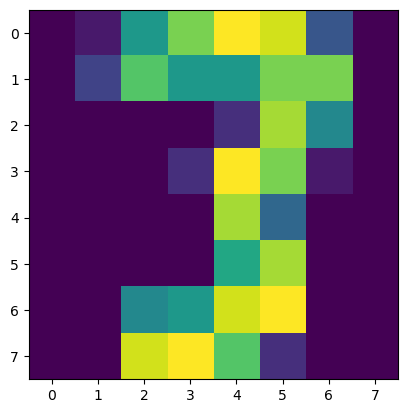

In [17]:
plt.imshow(digits.images[23])

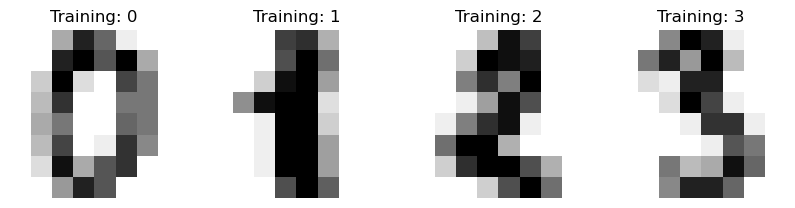

In [27]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Training: %i" %label)

In [28]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [31]:
digits.images.shape

(1797, 8, 8)

In [32]:
data.shape

(1797, 64)

In [33]:
# Create a classifier: support vector classifier
clf = svm.SVC(gamma=0.001)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

In [35]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [37]:
predicted = clf.predict(X_train)

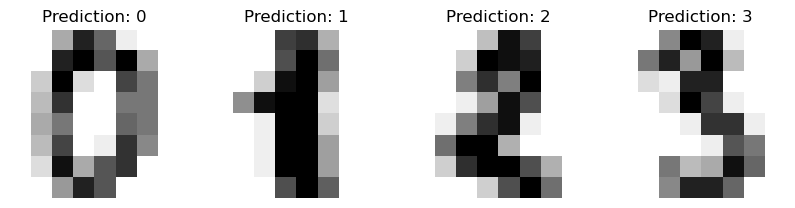

In [38]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {label}")

In [43]:
y_train.shape

(1437,)

In [42]:
predicted.shape

(1437,)

In [44]:
# classification_report builds a text report showing the main classification metrics.
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_train, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       146
           4       1.00      1.00      1.00       144
           5       1.00      0.99      1.00       145
           6       1.00      1.00      1.00       144
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       141
           9       0.99      1.00      1.00       143

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437




Confusion Matrix: 
[[143   0   0   0   0   0   0   0   0   0]
 [  0 146   0   0   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 144   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   1]
 [  0   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0]
 [  0   0   0   0   0   0   0   0 141   0]
 [  0   0   0   0   0   0   0   0   0 143]]


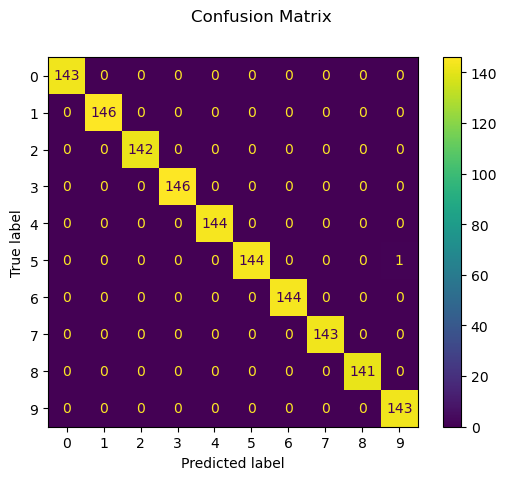

In [46]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_train, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion Matrix: \n{disp.confusion_matrix}")

plt.show()

In [47]:
predicted_test = clf.predict(X_test)

In [49]:
predicted_test.shape

(360,)

In [50]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted_test)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion Matrix: 
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


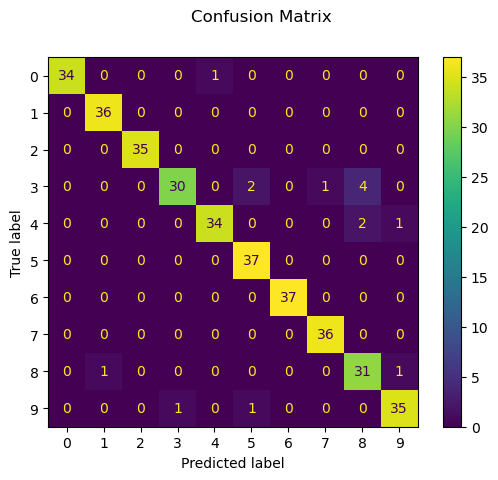

In [52]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion Matrix: \n{disp.confusion_matrix}")

plt.show()